<a href="https://colab.research.google.com/github/JuanJoseCardenas/PDS-Notebooks/blob/master/No_recursiv_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

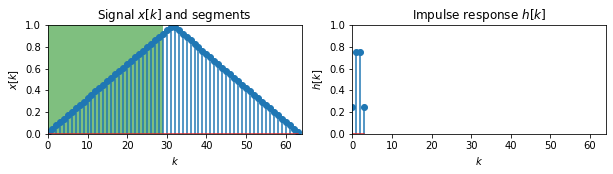

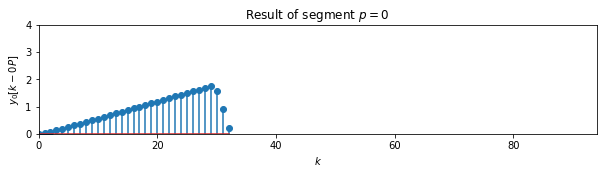

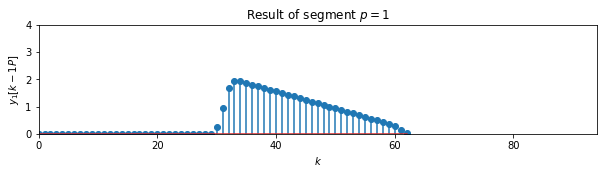

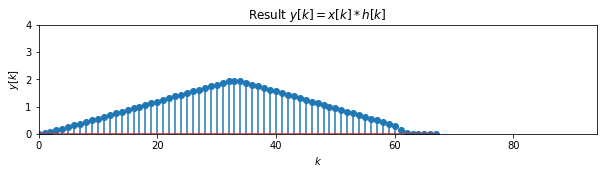

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


L = 64  # length of input signal
N = 4 # length of impulse response
P =30 # length of segments


# generate input signal
x = sig.triang(L)
# generate impulse response
h = sig.triang(N)

# overlap-add convolution
xp = np.zeros((L//P, P))
yp = np.zeros((L//P, N+P-1))
y = np.zeros(L+P-1)
for p in range(L//P):
    xp[p, :] = x[p*P:(p+1)*P]
    yp[p, :] = np.convolve(xp[p,:], h, mode='full')
    y[p*P:(p+1)*P+N-1] += yp[p, :]
y = y[0:N+L]


# plot signals
plt.figure(figsize = (10,2))

plt.subplot(121)
plt.stem(x)
for n in np.arange(L//P)[::2]:
    plt.axvspan(n*P, (n+1)*P-1, facecolor='g', alpha=0.5)
plt.title(r'Signal $x[k]$ and segments')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.axis([0, L, 0, 1])

plt.subplot(122)
plt.stem(h)
plt.title(r'Impulse response $h[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
plt.axis([0, L, 0, 1])

for p in np.arange(L//P):
    plt.figure(figsize = (10,2))
    
    plt.stem(np.concatenate((np.zeros(p*P), yp[p, :])))
    plt.title(r'Result of segment $p=%d$' %(p))
    plt.xlabel(r'$k$')
    plt.ylabel(r'$y_%d[k - %d P]$' %(p,p))
    plt.axis([0, L+P, 0, 4])
    

plt.figure(figsize = (10,2))
plt.stem(y)
plt.title(r'Result $y[k] = x[k] * h[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$y[k]$')
plt.axis([0, L+P, 0, 4]);



*   Change the length N of the impulse response and the length P of the segments. What changes?

Al cambiar la longitud de N de la respuesta al impulso y la longitud del segmento, tenemos que al disminuir mucho más el tamaño N que el P tenemos que el overlap es más pequeño y el tamaño del segmento mucho más grande.


*   What influence have these two lengths on the numerical complexity of the overlap-add algorithm?

La influencia de estas dos longitudes, es que son las que determinan el tamaño y el % de overlaping sobre la muestras.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

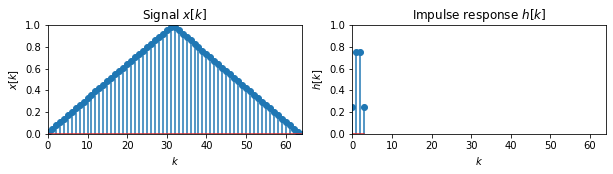

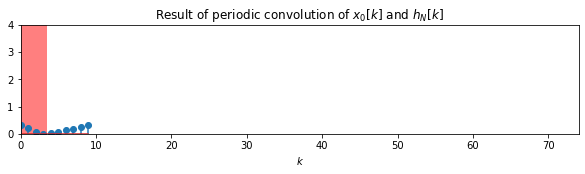

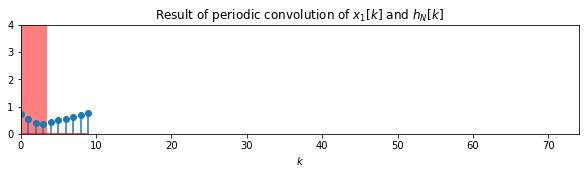

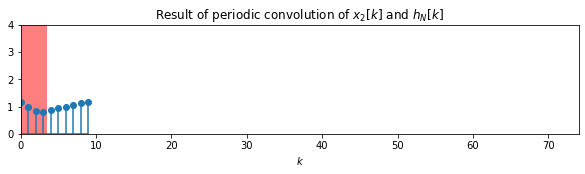

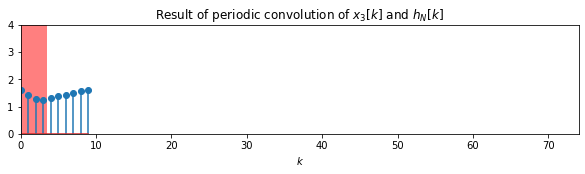

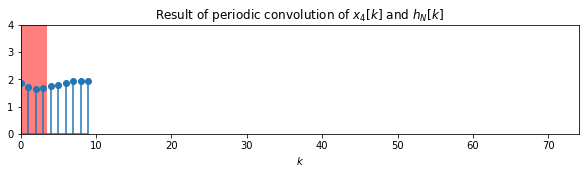

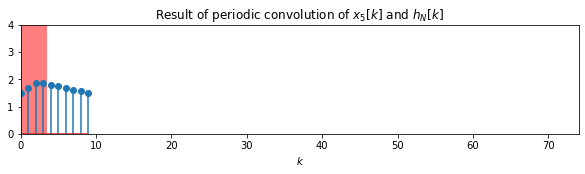

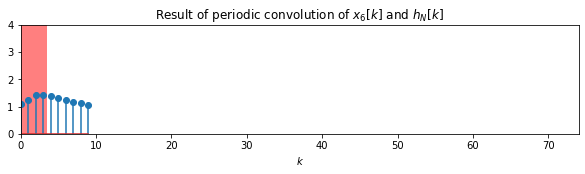

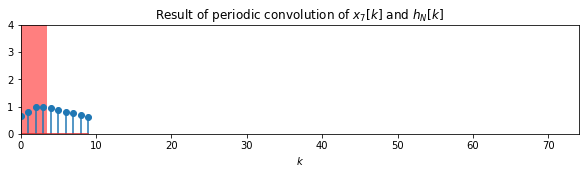

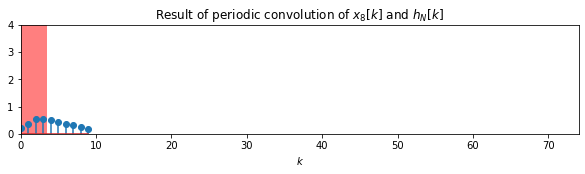

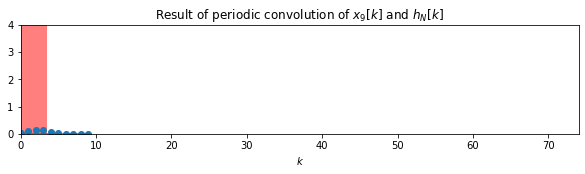

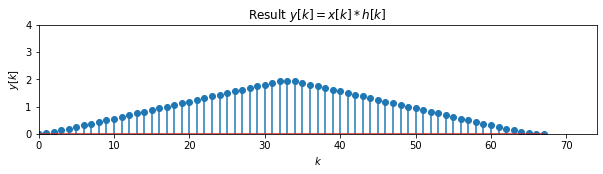

In [ ]:
 L= 64  # length of input signal
N = 4  # length of impulse response
P = 10  # length of segments


# generate input signal
x = sig.triang(L)
# generate impulse response
h = sig.triang(N)

# overlap-save convolution
nseg = (L+N-1)//(P-N+1) + 1
x = np.concatenate((np.zeros(N-1), x, np.zeros(P)))
xp = np.zeros((nseg, P))
yp = np.zeros((nseg, P))
y = np.zeros(nseg*(P-N+1))

for p in range(nseg):
    xp[p, :] = x[p*(P-N+1):p*(P-N+1)+P]
    yp[p, :] = np.fft.irfft(np.fft.rfft(xp[p, :]) * np.fft.rfft(h, P))
    y[p*(P-N+1):p*(P-N+1)+P-N+1] = yp[p, N-1:]
y = y[0:N+L]
    
plt.figure(figsize = (10,2))

plt.subplot(121)
plt.stem(x[N-1:])
plt.title(r'Signal $x[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.axis([0, L, 0, 1])

plt.subplot(122)
plt.stem(h)
plt.title(r'Impulse response $h[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
plt.axis([0, L, 0, 1])

for p in np.arange(nseg):
    plt.figure(figsize = (10,2))
    plt.stem(yp[p, :])
    plt.axvspan(0, N-1+.5, facecolor='r', alpha=0.5)
    plt.title(r'Result of periodic convolution of $x_%d[k]$ and $h_N[k]$' %(p))
    plt.xlabel(r'$k$')
    plt.axis([0, L+P, 0, 4])
    

plt.figure(figsize = (10,2))
plt.stem(y)
plt.title(r'Result $y[k] = x[k] * h[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$y[k]$')
plt.axis([0, L+P, 0, 4]);



*  Change the length N of the impulse response and the length P of the segments.
What changes?

Al aumentar el numero del segmento P y del tamaño del convolucion obtenemos que mas muestras de salida y una cantidad de puntos mayor por muestra

*   How many samples of the output signal $y[k]$ are computed per segment for a particular choice of these two values?

Estamos obteniendo una cantidad de puntos igual a P-N+1 como se puede observar en las graficas.

*   What would be a good choice for the segment length P with respect to the length N of the impulse response?

Lo ideal para obtener una buna elección para P y N debe cumplir la siguiente condición P=2N-1, mas o menos como el teorema de Nyquest




